<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-данных" data-toc-modified-id="Импорт-библиотек-и-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек и данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Иследование-баланса-классов" data-toc-modified-id="Иследование-баланса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Иследование баланса классов</a></span></li><li><span><a href="#Изучение-моделей-без-учёта-дисбаланса-классов" data-toc-modified-id="Изучение-моделей-без-учёта-дисбаланса-классов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изучение моделей без учёта дисбаланса классов</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки-(upsampling)" data-toc-modified-id="Увеличение-выборки-(upsampling)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки (upsampling)</a></span></li><li><span><a href="#Уменьшение-выборки-(downsampling)" data-toc-modified-id="Уменьшение-выборки-(downsampling)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уменьшение выборки (downsampling)</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов банка

- Цель проекта: построить модель прогнозирования, позволяющую предсказывать уход клиентов из банка на основании имеющихся исторических данных о поведении клиентов и расторжении договоров с банком.
- Для этого будет построена модель с предельно большим значением F1-меры. 
- Целевой показатель F1-меры  - не менее 0.59. 
- F1-мера будет проверяться на тестовой выборке, подготовленной в рамках проекта.

В рамках проекта будут сделаны следующие шаги:
- Подготовка данных
- Исследование задачи, а именно:
    - Исследован баланс классов
    - Изучены модели без учёта дисбаланса
- Применение несколько способов борьбы с дисбалансом
- Проведение тестирование модели для проверки достижения целевой метрики- не менее 0.59
- Исследование метрики AUC-ROC

## Импорт библиотек и данных

Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Импорт данных

In [2]:
try:
    df = pd.read_csv('Churn.csv')
except:
    df = pd.read_csv('/datasets/Churn.csv')

Обзор данных

In [3]:
print(df.info()) # вывод информации о датасете
display(df.head()) # печать первых 5 строк
df.isna().mean() # вывод процента пропусков в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


RowNumber          0.0000
CustomerId         0.0000
Surname            0.0000
CreditScore        0.0000
Geography          0.0000
Gender             0.0000
Age                0.0000
Tenure             0.0909
Balance            0.0000
NumOfProducts      0.0000
HasCrCard          0.0000
IsActiveMember     0.0000
EstimatedSalary    0.0000
Exited             0.0000
dtype: float64

**Вывод:**  
 - необходимо преобразовать стиль заголовков столбцов к змеиному регистру    
 - отбросить данные с пропусками в столбце "Tenure", поскольку их менее 10% от датасета. Значение данных в этом столбце важно для обучения моделей, а применение имеющихся методов заполнения пропусков может дать неоднозначный результат с возможным ухудшением, что неприемлемо.  
 - убрать столбцы с параметрами 'RowNumber','CustomerId' и 'Surname', поскольку они не помогают обучению моделей, а снижение количества параметров может ускорить процесс обучения.  
 - преобразовать категориальные признаки в столбцах 'Geography' и 'Gender' в численные техникой прямого кодирования (OHE)  
 - разбить данные на обучающую, валидационную и тестовую выборки.

## Подготовка данных

**Преобразование стиля заголовков столбцов.**

Вывод на экран названий столбцов:

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Исправление стиля в заголовках столбцов.

In [5]:
df = df.rename(columns={'RowNumber': 'row_number',\
                            'CustomerId': 'customer_id',\
                            'Surname': 'surname',\
                            'CreditScore':'credit_score',\
                            'Geography':'geography',\
                            'Gender':'gender',\
                            'Tenure':'tenure',\
                            'Age':'age',\
                            'Balance':'balance',\
                            'NumOfProducts':'num_of_products',\
                            'HasCrCard':'has_cr_card',\
                            'IsActiveMember':'is_active_member',\
                            'EstimatedSalary':'estimated_salary',\
                            'Exited':'exited',\
                           }) 
df.columns # контроль результата

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

**Проверка на явные дубликаты**

In [6]:
df.duplicated().sum()

0

**Вывод:**явные дубликаты отсутствуют

**Удаление из датасета данных с пропусками в столбце "tenure"**

In [7]:
df = df.dropna(subset=['tenure']) # удаление пропусков
df = df.reset_index(drop=True) # восстановление индексации
df.info() # контроль результата

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        9091 non-null   int64  
 1   customer_id       9091 non-null   int64  
 2   surname           9091 non-null   object 
 3   credit_score      9091 non-null   int64  
 4   geography         9091 non-null   object 
 5   gender            9091 non-null   object 
 6   age               9091 non-null   int64  
 7   tenure            9091 non-null   float64
 8   balance           9091 non-null   float64
 9   num_of_products   9091 non-null   int64  
 10  has_cr_card       9091 non-null   int64  
 11  is_active_member  9091 non-null   int64  
 12  estimated_salary  9091 non-null   float64
 13  exited            9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 994.5+ KB


**Удаление столбцов с параметрами 'row_number','customer_id','surname'**

In [8]:
df = df.drop(['row_number','customer_id','surname'], axis=1)
df.head() # контроль результата

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Преобразование категориальных признаков в столбцах 'geography' и 'gender' в численные техникой прямого кодирования.** 

In [9]:
df_ohe = pd.get_dummies(df,drop_first=True) # преобразование прямым кодированием
df_ohe.head() # контроль результата

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


**Разбиение данных на обучающую, валидационную и тестовую выборки в пропорции 3:1:1.**

In [10]:
# разбиение датасета на признаки и целевой признак
features = df_ohe.drop('exited', axis=1) #выделение выборки признаков
target = df_ohe['exited'] # выделение целевого признака датасета
    
# разделение обучающей и испытательной выборки в пропорции 3:2 со стратификацией
features_train, features_trial, target_train, target_trial = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)
    
# разделение испытательной выборки на проверочную и тестовую в пропорции 1:1 со стратификацией
features_valid, features_test, target_valid, target_test = train_test_split(
    features_trial, target_trial, test_size=0.5, random_state=12345, stratify=target_trial)

# вывод размеров выборок для проверки
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(5454, 11)
(5454,)
(1818, 11)
(1818,)
(1819, 11)
(1819,)


**Масштабирование численных данных**

In [11]:
# формируем список столбцов для масштабирования
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products','estimated_salary']

scaler = StandardScaler() # создание объекта
scaler.fit(features_train[numeric]) # настройка на обучающих данных 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

features_train.head() # контроль результата


C:\Users\user\AppData\Local\Temp\ipykernel_10284\307508192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
C:\Users\user\anaconda3\envs\practicum\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\user\AppData\Local\Temp\ipykernel_10284\307508192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8837,-1.292898,-0.660843,0.686341,0.786636,-0.910943,0,0,-0.223548,0,0,1
1090,-1.563714,0.778434,1.034232,0.833795,-0.910943,1,0,1.383021,0,1,0
7609,1.581914,0.106771,-0.357331,-1.222967,0.789359,1,1,-0.308331,0,1,1
7279,0.842379,0.010820,-1.053112,0.807063,-0.910943,1,1,-0.430980,0,1,0
2245,-0.397123,-1.236554,-0.357331,-1.222967,0.789359,1,1,1.392642,0,1,0


**Вывод:**  
В процессе подготовки данных было проделано следующее:  
 - исправление стиля в заголовках столбцов  
 - проверка на явные дубликаты  
 - обработка пропусков в данных  
 - удаление ненужных для построения моделей столбцов с параметрами 'row_number','customer_id','surname'  
 - преобразование категориальных признаков в столбцах 'geography' и 'gender' в численные техникой прямого кодирования.  
 - разбиение данных на обучающую, валидационную и тестовую выборки в пропорции 3:1:1

## Исследование задачи

### Иследование баланса классов

0    0.796062
1    0.203938
Name: exited, dtype: float64


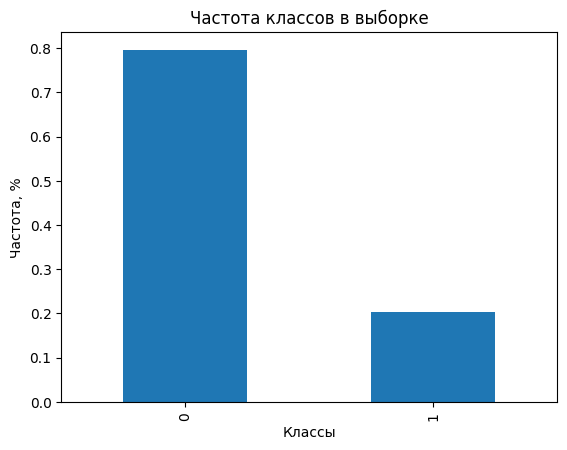

In [12]:
# вычисление и печать частоты классов в выборке
class_frequency = df['exited'].value_counts(normalize=True)
print(class_frequency)

# создаем график
class_frequency.plot(kind='bar')

# задаем заголовок
plt.title('Частота классов в выборке')

# задаем название оси x
plt.xlabel('Классы')

# задаем название оси y
plt.ylabel('Частота, %')

# выводим график
plt.show();

**Вывод:** 
 - Наблюдается дисбаланс классов, поскольку положительных ответов 20% от общего числа вопросов. 
 - Для улучшения качества модели необходима балансировка.

### Изучение моделей без учёта дисбаланса классов

Для дальнейшего решения задачи классификации нужно выбрать лучшую модель из трех: модель решающего дерева, модель случайного леса и модель логистической регрессии.  
Для этого исследуем все три модели на тестовой и валидационной выборках без учета дисбаланса классов и показавшую наилучший результат Accuracy будем использовать для решения задачи. 

**Исследование модели решающего дерева**

In [13]:
best_model = None
best_result = 0

# проверка эффективности модели в зависимости от гиперпараметра 
# глубины дерева в промежутке от 1 до 20
for leaf in range(1,20):  # цикл с перебором различного количества объектов листа
    for split in range(2,20):  # цикл с перебором различного количества объектов в узлах
        for depth in range(1, 20): # цикл с перебором различной глубины дерева
    
            #обучение модели с заданными в цикле гиперпараметрами
            model = DecisionTreeClassifier(
                    random_state=12345,
                    min_samples_leaf=leaf,
                    min_samples_split=split,
                    max_depth=depth) 
            model.fit(features_train, target_train) # обучение модели на тренировочной выборке
            predictions = model.predict(features_valid) # получение предсказания модели
    
            # определение качества модели на валидационной выборке 
            result = f1_score(target_valid, predictions)
    
            # выбор наилучшего результата и соответствующих ему гиперпараметров модели
            if result > best_result: 
                best_model = model # сохранение наилучшей модели
                best_result = result #  сохранение наилучшего значения метрики accuracy
                best_depth = depth # сохранение наилучшей глубины дерева
                best_leaf = leaf # сохранение наилучшего количества объектов листа
                best_split = split # сохранение наилучшего количества объектов в узлах
        
print("F1 наилучшей модели:", best_result)
print('Лучшая глубина дерева',best_depth)
print('Лучшее количество объектов листа',best_leaf)
print('Лучшее количество объектов в узлах',best_split)

F1 наилучшей модели: 0.6096096096096095
Лучшая глубина дерева 14
Лучшее количество объектов листа 5
Лучшее количество объектов в узлах 18


**Исследование модели случайного леса**

In [14]:
best_model = None
best_result = 0

# проверка эффективности модели в зависимости от гиперпараметров 
# числа деревьев в промежутке от 1 до 20 и 
# глубины дерева в промежутке от 1 до 20
for split in range(2,6): # цикл с перебором различного числа объектов в листьях
    for est in range(1, 20): # цикл с перебором различного количества деревьев
        for depth in range(1,20): # цикл с перебором различной глубины дерева
        
            #обучение модели с заданными в циклах гиперпараметрами
            model = RandomForestClassifier(
                    random_state=12345, 
                    min_samples_split=split,
                    n_estimators=est,
                    max_depth=depth) 
            model.fit(features_train,target_train) # обучение модели на тренировочной выборке
            predictions = model.predict(features_valid) # получение предсказания модели
        
            # определение качества модели на валидационной выборке
            #result = accuracy_score(target_valid,predictions)
            result =f1_score(target_valid, predictions)
       
        
            # выбор наилучшего результата и соответствующих ему гиперпараметров модели
            if result > best_result: 
                best_model = model # сохранение наилучшей модели
                best_result = result #  сохранение наилучшего значения метрики F1
                best_split = split # сохранение наилучшего количества объектов в узлах
                best_est = est # сохранение наилучшего количества деревьев
                best_depth = depth # сохранение наилучшей глубины дерева

print("F1 наилучшей модели:", best_result)
print('Лучшее количество деревьев',best_est)
print('Лучшая глубина дерева',best_depth)
print('Лучшее количество объектов в узлах',best_split)

F1 наилучшей модели: 0.6206896551724137
Лучшее количество деревьев 14
Лучшая глубина дерева 12
Лучшее количество объектов в узлах 4


**Исследование модели логистической регрессии**

In [15]:
best_model = None
best_result = 0

# проверка эффективности модели в зависимости от гиперпараметра 
# количества итераций обучения в промежутке от 100 до 500 c шагом 10

for iter in range(100, 500, 10): # цикл с перебором различного количества итераций обучения
    
    # обучение модели с заданным количеством итераций
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=iter)
    model.fit(features_train,target_train) # обучение модели на тренировочной выборке
    predictions = model.predict(features_valid) # получение предсказания модели
    
    # определение качества модели на валидационной выборке
    result =f1_score(target_valid, predictions)
    
    # выбор наилучшего результата и соответствующих ему гиперпараметров модели
    if result > best_result: 
        best_model = model # сохранение наилучшей модели
        best_result = result #  сохранение наилучшего значения метрики accuracy на валидационных данных
        best_max_iter = iter # сохранение наилучшего количества итераций обучения

print("F1 наилучшей модели:", best_result)
print('Лучшее количество итераций обучения',best_max_iter)

F1 наилучшей модели: 0.3306772908366534
Лучшее количество итераций обучения 100


**Вывод:**  
Было проведено исследование для разных гиперпараметров на обучающей и валидационной выборке трёх моделей классификации:  
- модель решающего дерева
- модель случайного леса
- модель логистической регрессии 

Наилучший результат (Accuracy) =  0.8602 показала модель случайного леса с количеством деревьев 14 и глубиной дерева 13.  
Именно она и признана лучшей моделью в данном проекте.

## Борьба с дисбалансом

Для улучшения качества модели необходимо произвести балансировку данных.  
Для этого применим следующие методы:  
 - Взвешивание классов  
 - Увеличение выборки (upsampling)  
 - Уменьшение выборки (downsampling)
 
Выбор лучшего метода для дальнейшего использования в данном проекте будем проводить на основе показателя F1-меры.  \
Дополнительно будет измеряться метрика AUC_ROC.

**Определим функцию для вычисления метрик моделей**

In [16]:
def metrics(features, target, prediction):
    # вычисление F1-меры модели
    f1_rate=f1_score(target, prediction) 

    # определение метрики AUC-ROC модели 
    probabilities= model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    auc_roc = roc_auc_score(target, probabilities_one)
    
    # определение accuracy модели
    accuracy = accuracy_score(target, prediction)

    # печать результата
    print("F1-мера модели:", f1_rate)
    print("Метрика AUC-ROC модели:", auc_roc)
    print("Метрика Accuracy модели:", accuracy)

### Взвешивание классов

In [17]:
# обучение модели с заданным количеством деревьев и взвешиванием классов
model = RandomForestClassifier(
    random_state=12345, min_samples_split=4, n_estimators=14,
    max_depth=12, class_weight='balanced')
model.fit(features_train,target_train) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) # получение предсказания модели

# вычисление метрик модели на валидационной выборке и
# вывод на экран
metrics(features_valid, target_valid, predicted_valid) 


F1-мера модели: 0.6171428571428572
Метрика AUC-ROC модели: 0.8580695816420999
Метрика Accuracy модели: 0.8525852585258525


### Увеличение выборки (upsampling)

Разделим обучающую выборку на отрицательные и положительные объекты.

In [18]:
features_zeros = features_train[target_train == 0] # признаки объектов с ответом «0»
features_ones = features_train[target_train == 1] # признаки объектов с ответом «1»
target_zeros = target_train[target_train == 0] # целевой признак объектов, у которых ответы только «0»
target_ones = target_train[target_train == 1] # целевой признак объектов, у которых ответы только «1»

# выведем параметры полученных выборок
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4342, 11)
(1112, 11)
(4342,)
(1112,)


**Вывод:**   
 - Количество положительных объектов в обучающей выборке 1112, а отрицательных 4342. 
 - Следовательно необходимо продублировать объекты положительного класса четыре раза для получения увеличенной выборки, чтобы сблизить количество объектов обоих классов. 

Выполним процедуру увеличения выборки с выбранным параметром итераций дублирования

In [19]:
repeat = 4 # число итераций дублирования объектов положительного класса 

# дублированиe объектов положительного класса  и объединение таблиц с признаками
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)

# дублированиe объектов положительного класса  и объединение столбцов с целевым признаком
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

# перемешаем данные 
features_upsampled, target_upsampled = shuffle(
    features_upsampled,target_upsampled,random_state=12345)

# вывод на экран параметров новой выборки
print(features_upsampled.shape)
print(target_upsampled.shape)

(8790, 11)
(8790,)


**Вывод:** Классы приемлемо сбалансированы. Результат обучения модели предположительно может улучшиться. 

Обучим модель на новой увеличенной выборке.

In [20]:
model = RandomForestClassifier(random_state=12345,  min_samples_split=4, n_estimators=14,
    max_depth=12)
model.fit(features_upsampled,target_upsampled) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) # получение предсказания модели

# вычисление метрик модели на валидационной выборке и
# вывод на экран
metrics(features_valid, target_valid, predicted_valid)

F1-мера модели: 0.6177606177606179
Метрика AUC-ROC модели: 0.8588361085394636
Метрика Accuracy модели: 0.8366336633663366


**Вывод:**  
Метод увеличения выборки показал лучший результат F1-меры 0.6178 по сравнению с результатом метода взвешивания классов 0.6171.  
Данный метод также  показал лучший результат и по метрике AUC-ROC показал: 0.8588 против 0.8580 метода взвешивания классов.  
При этом разница в обоих случаях небольшая (в третьем знаке после запятой).  
Следует заметить, что сравнение метрик Accuracy дало противоположный результат: 0.8366 против 0.8526 

### Уменьшение выборки (downsampling)

Исходя из ранее полученного соотношения классов в обучающей выборке уменьшим количество объектов отрицательного класса примернов три раза, чтобы достичь близкого соотношения количества обоих классов. Воспользуемся выборкой, ранее уже разделенной на положительные и отрицательные объекты.

In [21]:
# коэфициент уменьшения количества объектов отрицательного класса
fraction = 0.25 

# уменьшение объектов отрицательного класса  и 
# объединение таблиц с признаками
features_downsampled = pd.concat([features_zeros.sample(
    frac=fraction, random_state=12345)] + [features_ones])

# уменьшение объектов отрицательного класса  и 
# объединение столбцов с целевым признаком
target_downsampled = pd.concat([target_zeros.sample(
    frac=fraction, random_state=12345)] + [target_ones])

# перемешаем данные     
features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)

# вывод на экран параметров новой выборки
print(features_downsampled.shape)
print(target_downsampled.shape)

(2198, 11)
(2198,)


**Вывод:** Классы приемлемо сбалансированы. Результат обучения модели предположительно может улучшиться. 

Обучим модель на новой уменьшенной выборке.

In [22]:
model = RandomForestClassifier(random_state=12345, min_samples_split=4, n_estimators=14,
    max_depth=12)
model.fit(features_downsampled,target_downsampled) # обучение модели на тренировочной выборке
predicted_valid = model.predict(features_valid) # получение предсказания модели

# вычисление метрик модели на валидационной выборке и
# вывод на экран
metrics(features_valid, target_valid, predicted_valid)

F1-мера модели: 0.5888324873096447
Метрика AUC-ROC модели: 0.8659425486693354
Метрика Accuracy модели: 0.7772277227722773


**Вывод:**  
Метод уменьшенной выборки показал наихудший результат F1-меры: 0.5888 по сравнению с результатами методов увеличения выборки: 0.6178 и взвешивания классов 0.6171.  
Также этот метод показал наихудший результат и по метрике Accuracy: 0.7772 против 0.8366 и 0.8526  
Однако, по метрике AUC-ROC данный метод показал противоположный резултат: 0.8659 против 0.8588 и 0.8580.

**Вывод по результатам исследования:**  
Из трех исследованных методов борьбы с дисбалансом классов наилучший результат F1- меры показал метод увеличения выборки.  
Он и будет применен в дальнейшем решении задачи.  
При этом разница в показаниях F1- меры между методами взвешивания классов и увеличения выборки незначительна.  
Показания метрик AUC-ROC и Accuracy в ряде случаев противоречили соотношениям F1 меры.  
Следовательно, если целевым показателем в проекте является F1-мера, то целесообразно использовать именно ее для выбора метода борьбы с дисбалансом. 

## Тестирование модели

Проверим на тестовой выборке модель случайного леса, обученную на увеличенной выборке

In [23]:
model = RandomForestClassifier(random_state=12345,  min_samples_split=4, n_estimators=14,
    max_depth=12)
model.fit(features_upsampled,target_upsampled) # обучение модели на тренировочной выборке
predicted_test = model.predict(features_test) # получение предсказания модели

print("Лучшая модель, тестовая выборка")

# вычисление метрик модели на тестовой выборке и
# вывод на экран
metrics(features_test, target_test, predicted_test)

Лучшая модель, тестовая выборка
F1-мера модели: 0.6018641810918774
Метрика AUC-ROC модели: 0.8400721880537892
Метрика Accuracy модели: 0.8356239692138537


**Вывод:**  
Лучшая модель случайного леса с гиперпараметрами min_samples_split=4, n_estimators=14,
    max_depth=12, обученная на увеличенной тренировочной выборке, показала на тестировании показатель F1-меры 0.60, превышающий целевой уровень для данного проекта, равный  0.59.  
Следовательно, тестирование модели прошло успешно.  
Как и ожидалось, показания обеих метрик на тестовой выборке уступают таковым на валидационной, но разница незначительна, что говорит о высоком качестве методик обучения, принимая во внимание хороший уровень показаний метрик в целом.

## Проверка модели на адекватность

Для проверки на адекватность использовалась модель DummyClassifier с гиперпараметром strategy="most_frequent", когда модель всегда возвращает наиболее часто используемую метку класса в целевом признаке, переданном для обучения.  
Если результат (accuracy) лучшей модели будет больше, чем у DummyClassifier, то лучшая модель будет признана адекватной. 

In [24]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_upsampled,target_upsampled) # обучение модели на тренировочной выборке
predictions_dummy = dummy_clf.predict(features_test) # получение предсказания модели

print("Модель Dummy, тестовая выборка")

# определение качества модели Dummy на тестовой выборке
print("Accuracy:", accuracy_score(target_test, predictions_dummy)) 

Модель Dummy, тестовая выборка
Accuracy: 0.2039582188015393


**Вывод:**
Лучшая модель случайного леса с гиперпараметрами min_samples_split=4, n_estimators=14,
    max_depth=12, показала результат Accuracy 0.8356, что превышает результат модели DummyClassifier 0.8070, следовательно лучшая модель прошла проверку на адекватность.

## Общий вывод

**По проекту было выполнено следующее:**
- импорт и обзор данных
- обработка данных 
   - коррекциея стиля заголовков
   - удаление пропусков в данных
   - проверка на наличие явных дубликатов
   - преобразование категориальных признаков в численные
   - удаление лишних данных
 
 - разбиение данных на обучающую, валидационную и тестовую выборки в пропорции 3:1:1
- исследование баланса классов 
- исследование на обучающей и валидационной выборке трёх моделей:
    - модель решающего дерева
    - модель случайного леса
    - модель логистической регрессии
- выбор лучшей модели без учета дисбаланса в данных 
- выбор лучшего метода борьбы с дисбалансом
- проверка лучшей обученной модели на тестовой выборке и на адекватность.

**Выводы:**
- Лучшей моделью по результатам исследования признана модель случайного леса с гиперпараметрами min_samples_split=4, n_estimators=14, max_depth=12. 
- Лучшим методом борьбы с дисбалансом данных в данном проекте на основаниии показателя F1-меры признан метод увеличения выборки.
- Выбор метода борьбы с дисбалансом был полностью подтвержден также измеряемым показателем AUC-ROC.
- Разница в показаниях F1-меры и метрики AUC-ROC между методами взвешивания классов и увеличения выборки невелика. 
- Лучшая модель, обученная на увеличенной тренировочной выборке, показала на тестировании уровень F1-меры 0.60, превышающий целевой уровень для данного проекта, равный  0.59.
- Показания метрик F1-мера и AUC-ROC на тестовой выборке уступают таковым на валидационной, но разница незначительна, что говорит о высоком качестве методик обучения, принимая во внимание хороший уровень показаний метрик в целом.
- Данная модель успешно прошла проверку на адекватность в с равнениии с моделью DummyClassifier.



**Рекомендации сотрудникам банка:** 
- Построенную в рамках данного проекта систему анализа поведения клиентов можно применять для выявления целевой группы клиентской базы с наибольшей вероятностью ухода, что может помочь выработке специального комплекса мер по их удержанию.** 